<center>
    <h1>Apprentissage supervisé : la régression linéaire</h1>
</center>


## Objectif du TP :

Dans ce TP, les étudiants mettront en œuvre un algorithme d'apprentissage supervisé : **la régression linéaire**. En particulier, on s'intéressera à deux types de régression linéaire:
- **la régression linéaire simple**: utilise une seule variable indépendante (ou explicative) pour prédire une variable dépendante (cible).
- **la régression linéaire multiple**: utilise plusieurs variables indépendantes pour prédire une variable dépendante.

 



**La régression linéaire**
- est l'une des branches les plus fondamentales de l'apprentissage supervisé.
- est un outil statistique puissant permettant d'examiner la relation entre deux ou plusieurs variables d'intérêt.
- est utilisée pour estimer la relation entre une variable dépendante et diverses variables indépendantes.


- son principe est de tracer une ligne qui correspond le mieux aux données. Cette ligne est connue sous le nom de `ligne de régression` et représente les valeurs prédites générées par l'algorithme. Elle est une droite dans le cas de régression linéaire simple et plus généralement un hyperplan dans le cas de régression linéaire multiple.


# Rappel


### C'est quoi l'apprentissage supervisé :



- **L'apprentissage supervisé, également appelé apprentissage automatique supervisé, est une sous-catégorie de l'apprentissage automatique et de l'intelligence artificielle.**


- **Il se définit par l'utilisation d'ensembles de données labelisées pour former des algorithmes permettant de classer des données ou de prédire des résultats avec précision.**


- **Au fur et à mesure que les données d'entrée sont introduites dans le modèle, celui-ci ajuste ses poids jusqu'à ce que le modèle soit correctement ajusté.**



###  Comment fonctionne l'apprentissage supervisé :


- L'apprentissage supervisé utilise un ensemble d'apprentissage pour apprendre aux modèles à produire les résultats souhaités.


- Cet ensemble de données d'apprentissage comprend des entrées et des sorties correctes, ce qui permet au modèle d'apprendre au fil du temps.


- L'algorithme mesure sa précision en utilisant des formules mathématiques, et s'ajuste jusqu'à ce que l'erreur soit suffisamment minimisée.

### a. Partie pour l'apprentissage et partie pour le test (train test split):

- Une approche consiste à diviser notre dataset en deux parties : une partie pour le `training` et l'autre pour le `testing`.

- L'idée consiste à entraîner des différents modèles à l'aide de l'ensemble d'entraînement, ensuite on passe à l'étape de l'évaluation sur la liste du test pour choisir le modèle le plus performant.


### Exemple d'application :

- Nous allons utiliser la fonction `train_test_split()` pour choisir aléatoirement une liste pour le training et une liste pour le testing.
- Cette fonction accepte un ou plusieurs tableaux (arrays) (tels que des listes, des tableaux de NumPy ou des DataFrames de pandas) en entrée et divise le(s) tableau(x) en sous-ensembles de training et de test. Après la division, elle renvoie deux ou plusieurs tableaux contenant la répartition train-test du ou des tableaux d'entrée.

In [85]:
X=[1,2,3,4,5,6,7,8,9,10]
y=[23,11,31,45,12,65,43,90,13,12]


- La fonction divise aléatoirement les deux tableaux et renvoie quatre tableaux. Si nous effectuons une répartition $80-20$, la fonction peut retourner les tableaux suivants :

In [86]:
# training subset :
X=[1,2,4,5,6,7,9,10]
y=[23,11,45,12,65,43,13,12]

In [87]:
# test subset :
X=[3,8]
y=[31,90]

### b.  validation croisée à K couches (K-Fold Cross-Validation):

- La validation croisée à $k$ couches implique de diviser notre dataset en $k$ sous-ensembles, appelés k couches.


- Sur les $k$ couches, $k-1$ d'entre eux sont utilisés pour l'apprentissage, tandis que la couche restante est utilisée pour la validation.


- L'algorithme est entraîné et testé $k$ fois, en utilisant à chaque fois une nouvelle couche comme ensemble de validation.


- Enfin, le résultat du processus de validation croisée est la moyenne des résultats obtenus à chaque passage.


In [88]:
X=[1,2,3,4,5,6,7,8,9,10]
y=[23,11,31,45,12,65,43,90,13,12]

- On utilise, par exemple, une validation croisée à 3 couches.


Couche 1 :

In [89]:
X=[1,5,9]
y=[23,12,13]

Couche 2 :

In [90]:
X=[2,6,8]
y=[11,65,90]

Couche 3:

In [91]:
X=[3,4,7]
y=[31,45,43]

# Régression linéaire simple

- Pour appliquer la validation croisée, on fait le training du modèle sur les couches $1$ et $2$ et on fait le test en utilisant la couche $3$.

- On fait le même process en changeant les couches de test et de training : $2$ et $3$ pour le training et $1$ pour le test, ensuite $3$ et $1$ pour le training et $2$ pour le test.

- Chaque evaluation va donner un score, exemple, $0.97$, $0.93$, $0.99$.


- On prend la moyenne de ces scores $(0.97+0.93+0.99)/3=0.963$.

#### Comment peut on choisir la meilleure droite :



- La régression linéaire $\underline{\mbox{simple}}$ utilise une droite pour définir la relation entre deux variables, X et Y et elle utilise le modèle mathématique suivant :

$$Y=\beta_0+\beta_1 X$$.


- La régression linéaire $\underline{\mbox{multiple}}$ utilise un hyperplan pour définir la relation entre plusieur variables indépendantes $X_1, X_2,\dots X_n$ et la variable dépendante Y et elle utilise le modèle mathématique suivant :

$$Y=\beta_0+\beta_1 X_1+\beta_2 X_2+\dots + \beta_n X_n=\beta_0+\begin{pmatrix}\beta_1&\beta_2&\dots&\beta_n\end{pmatrix}\begin{pmatrix}X_1\\X_2\\\vdots\\X_n\end{pmatrix}=\beta_0+\beta.X$$.

- $\beta=\begin{pmatrix}\beta_1&\beta_2&\dots&\beta_n\end{pmatrix}$ et $X=\begin{pmatrix}X_1\\X_2\\\vdots\\X_n\end{pmatrix}$


- $\beta_0,\beta_1,\beta_2,\dots,\beta_n$ sont les paramètres du modèles, et l'objectif principal de l'algorithme est de déterminer les meilleures valeurs pour ces paramètres.


- L'erreur d'un point de données est la distance entre sa valeur prédite et sa valeur réelle. Cette erreur est techniquement connue comme le résidu.

- L'objectif de l'algorithme de régression linéaire est de trouver les meilleures valeures $\beta_0,\beta_1,\beta_2,\dots,\beta_n$ qui donne le plus petit Mean Squared Error : une fonction construite par tous les résidus et avec des variables $\beta_0,\beta_1,\beta_2,\dots,\beta_n$.

$\Rightarrow$ La régression linéaire multiple est plus performante que la La régression linéaire simple.

## Les étapes pour appliquer **la régression linéaire**:

1. Importer des modules spécifiques (linear_model, model_selection) à partir des bibliothèques (sklearn) nécessaires pour le modèle.


2. Construire la dataframe.


3. Examiner la data.


4. Diviser la data en deux parties : training and testing.


5. Visualiser  la data.


6. Entrainer le modèle.


7. Evaluer le modèle.

### **1. Importer les bibliothèques nécessaires pour le modèle.**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### **2. Construire la dataframe.**

In [93]:
#Chargement des données
housing = pd.read_csv('house_area_price.csv')

### **3. Examiner la data.**

In [94]:
#Number of rows and columns
housing.shape

(1000, 2)

In [95]:
#Show the first 5 rows of the dataset
housing.head()

,Area,Price
0,1360,2.623829e+05
1,4272,9.852609e+05
2,3592,7.779774e+05
3,966,2.296989e+05
4,4926,1.041741e+06


In [96]:
#Get information about columns
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    1000 non-null   int64  
 1   Price   1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [97]:
# Generate descriptive statistics.
housing.describe()

,Area,Price
count,1000.000000,1.000000e+03
mean,2815.422000,6.188610e+05
std,1255.514921,2.535681e+05
min,503.000000,1.116269e+05
25%,1749.500000,4.016482e+05
50%,2862.500000,6.282673e+05
75%,3849.500000,8.271413e+05
max,4999.000000,1.108237e+06


In [30]:
#check for duplicate rows
housing.duplicated().sum()

0

In [31]:
#Check for missing values
housing.isnull().sum()

Area     0
Price    0
dtype: int64

### **4. Diviser la data en deux parties : training and testing.**


In [32]:
X = housing[['Area']]
y = housing['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

### 5. **Visualiser  la data.**


Text(0, 0.5, 'Price')

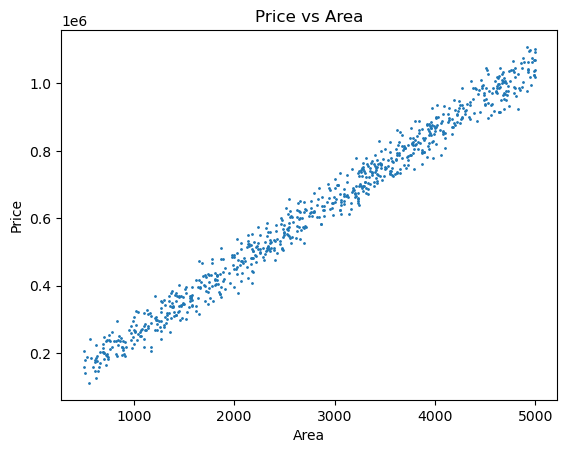

In [33]:
plt.scatter(X_train['Area'], y_train, s=1)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')

### **6. Entrainer le modèle.**


In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
print(lr.intercept_)
print(lr.coef_)

57087.17915647896
[200.21142071]


Text(0, 0.5, 'Price')

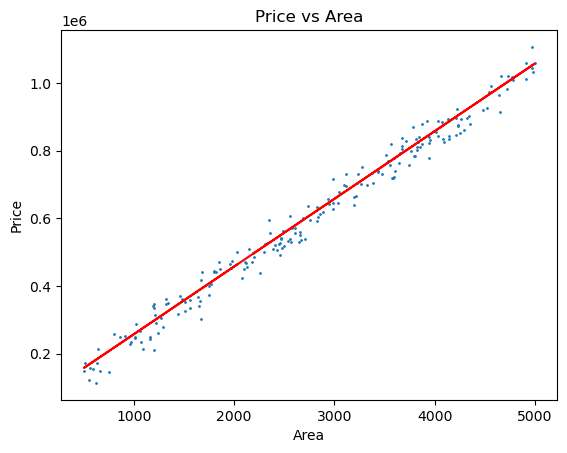

In [36]:
plt.scatter(X_test['Area'], y_test, s=1)

y_pred = lr.predict(X_test)
plt.plot(X_test['Area'], y_pred, color='red')

plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')

### **7. Evaluer le modèle.**
Discutons des critères d'évaluation des modèles de régression. Les mesures couramment utilisées sont:
- L'erreur absolue moyenne (MAE)
- l'erreur quadratique moyenne racine (Root Mean Squared Error) 
- le R-carré (R squared).


### 7.1 L'erreur absolue moyenne (MAE): 
- Cette valeur mesure l'ampleur moyenne des erreurs entre les valeurs prédites et les valeurs réelles, sans tenir compte de la direction de ces erreurs.
$$ MAE = \frac{1}{n} \sum \lvert y_{vrai} - y_{pred} \rvert $$
- Supposons que nous avons deux listes: **pred** et **true** qui stockent les valeurs réelles et les valeurs prédites :

In [42]:
pred=[2.1,1.4,5.6,7.9]
true=[2.5,1.6,5.1,6.8]

Pour calculer le MAE, on commence par
- Calculer la différence entre les valeurs des deux listes $\Rightarrow \; [-0.4,-0.2, 0.5, 1.1]$.


- On cherche les valeurs absolues des valeurs obtenues $\Rightarrow \; [0.4, 0.2, 0.5, 1.1]$.


- On Calcule la somme $\Rightarrow \; 0.4+0.2+0.5+1.1=2.2$.


$\Rightarrow$ MAE = $2.2$.


### 7.2 L'erreur quadratique moyenne racine (Root Mean Squared Error): RMSE


- Cette valeur est déterminée en calculant la racine carrée de la moyenne des différences au carré entre les valeurs réelles et les valeurs prédites.

 $$RMSE=\sqrt{\dfrac{e^2_1+e^2_2+\dots+e^2_n}{n}}, \; \mbox{avec} \;e_i=y_i-\tilde{y}_i$$

- Dans l'exemple précédent:

In [45]:
pred=[2.1,1.4,5.6,7.9]
true=[2.5,1.6,5.1,6.8]

Pour calculer le MSE, on commence par
- Calculer la différence entre les valeurs des deux listes $\Rightarrow \; [-0.4,-0.2, 0.5, 1.1]$.


- On cherche les carrés des valeurs obtenues $\Rightarrow \; [0.16, 0.4, 0.25, 1.21]$.


- On cherche la moyenne des valeurs trouvées $\Rightarrow \; \dfrac{(0.16+0.4+0.25+1.21)}{4}=0.505$.


$\Rightarrow$ RMSE = la racine carrées de la moyenne = $\sqrt{0.505}=0.71$.

### 7.3 le R-carré (R squared): $R^2$


- Aussi connue sous le nom score $R^2$, c'est une mesure statistique de la proximité des données par rapport à la ligne de régression ajustée. Il est également connu sous le nom de coefficient de détermination, ou de coefficient de détermination multiple pour la régression multiple.

 $$R^2 \mbox{score}=1-\dfrac{\mbox{Sum of Squared Differences between predicted and true values}}{\mbox{Sum of Squared Differences between true values and mean of true values}} = 1-\dfrac{\sum(y_{p_i} - y_{t_i})^2}{\sum (y_{t_i} - \bar{y_t})^2}$$


- $R^2$ est entre $0\%$ et $100\%$ __dans le contexte de la régression linéaire__ :

    $0\%$ indique que le modèle n'explique aucune des variabilités des données de réponse autour de sa moyenne.
    
    $100\%$ indique que le modèle explique toute la variabilité des données de réponse autour de sa moyenne.
    
    __Cependant, il est important de noter que dans certains cas particuliers, comme les modèles de régression non linéaire ou les modèles mal spécifiés, les valeurs de $R^2$ peuvent être négatives.__

On prend les mêmes listes :

In [46]:
pred=[2.1,1.4,5.6,7.9]
true=[2.5,1.6,5.1,6.8]

- On commence par calculer la différence entre les valeurs des deux listes $\Rightarrow \; [-0.4,-0.2, 0.5, 1.1]$.


- On cherche le carrés des valeurs de la liste $\Rightarrow \; [0.16, 0.4, 0.25, 1.21]=$ Squared Differences between predicted and true values $= (y_{p_i} - y_{t_i})^2 $


- On va calculer la somme: $\sum (y_{p_i} - y_{t_i})^2=0.16+0.4+0.25+1.21=1.66$.


- On cherche la moyenne des valeurs de la liste true $\Rightarrow \; \dfrac{(2.5+1.6+5.1+6.8)}{4}=4$.


- On cherche la liste de la difference entre les valeurs de true et leurs moyenne ${(y_{t_i} - \bar{y_t})^2}$ $[-1.5,-2.4,1.1,2.8]\; \Rightarrow\; \mbox{les carrés} =[2.25,5.76,1.21,7.84]$.


- On fait la somme ${\sum(y_{t_i} - \bar{y_t})^2}$ $=2.25+5.76+1.21+7.84=17.06$.


$$\Rightarrow R^2= 1-\dfrac{\sum(y_{p_i} - y_{t_i})^2}{\sum (y_{t_i} - \bar{y_t})^2}=1-\dfrac{1.66}{17.06}=0.902696$$

In [64]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(MAE)
print(RMSE)
print(r2)

27085.216196781057
32737.020858082953
0.982164362898043


# Régression linéaire multiple

### **1. Importer les bibliothèques nécessaires pour le modèle.**

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


### **2. Construire la dataframe.**

In [66]:
boston=pd.read_csv('boston.xls')

### **3. Examiner la data.**

In [67]:
#Number of rows and columns
boston.shape

(506, 13)

In [68]:
#Show the first 5 rows of the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [69]:
#Get information about columns
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [70]:
# Generate descriptive statistics.
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [71]:
#check for duplicate rows
boston.duplicated().sum()

0

In [72]:
#Check for missing values
boston.isnull().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### **4. Diviser la base de données en deux tableaux $Xm$ (tableau d'observations) et $ym$ (la variable cible)**

In [73]:
Xm = boston.iloc[:,0:12]
ym = boston['MEDV']

In [74]:
#Diviser les données: 80% pour l'entrainement et 20% pour le test:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=3)

### **5. Entrainer le modèle.**

*The following code standardizes the training and test datasets so that they have a mean of 0 and a standard deviation of 1, which is a common preprocessing step for many machine learning algorithms (Standardization (Standard Scaler)):*

In [75]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform Xm_train
Xm_train_sc = scaler.fit_transform(Xm_train)

# Transform Xm_test
Xm_test_sc = scaler.transform(Xm_test)

*Entraîner le modèle et prédire les labels de Xm_test*

In [76]:
lr = LinearRegression()
lr.fit(Xm_train_sc, ym_train)
ym_pred = lr.predict(Xm_test_sc)

*Parameters & Predictions*

In [77]:
print('Intercept = ', lr.intercept_)

print('Coefficients : ', lr.coef_)

print("Predictions: ", ym_pred)

Intercept =  22.44876237623762
Coefficients :  [-1.23841172  1.10163258 -0.39011931  0.89485475 -1.90219224  2.33976633
 -0.16405381 -3.14828542  2.43879511 -1.88207638 -1.91432074 -3.71625159]
Predictions:  [37.31898248 18.46482093 21.23294456 32.61729704 24.44406625 23.46532838
 17.92040103  8.52548064 21.01604097 17.86042945 13.83065586 31.96672955
 35.9563909  30.94553207  6.63958192 10.89614257 23.2937994  14.68299896
 13.8934246  29.80661985 26.99762483 35.14258203 27.1375803  24.18379709
 12.50379236 24.82592521 20.7086089  19.48938848 19.45484836 24.63066726
 15.62854042 34.3766497  20.80190155 22.75412241 19.36511143 16.81360615
 21.47978928 32.04823499 15.61619799 21.8107453  17.89203644  9.49147262
 25.15627282 17.48053125 22.85826359 25.42938243 26.78254544 17.99420865
 27.91719928 20.39819194 22.6290578  19.22861921 37.99067433 18.39080947
 22.41059121 13.12895939 35.39586919 15.70295774 31.97163123 19.09817451
 23.7571845  21.51368816 32.75918957 33.1912116  23.29383397 2

### **6. Evaluer le modèle.**

In [79]:
# Evaluer les performance de votre modèle en utilisant les indicateurs de performance adequats

# Calculer la racine de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(ym_test, ym_pred, squared=False)
print("Root Mean Squared Error (RMSE): ", rmse)

# Calculer l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(ym_test, ym_pred)
print("Mean Absolute Error (MAE): ", mae)

# Calculer le coefficient de détermination (R²)
r2 = r2_score(ym_test, ym_pred)
print("R-squared (R²): ", r2)

Root Mean Squared Error (RMSE):  4.129190261112695
Mean Absolute Error (MAE):  3.0141402036070413
R-squared (R²):  0.7939670979504735
